In [134]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import activations

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [160]:
keras.losses.CategoricalCrossentropy(from_logits=True).name

'categorical_crossentropy'

In [105]:
qc_raw_data_df = pd.read_csv("QC_2016_01_01_TO_2018_08_31.csv")
qc_raw_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax,974.0,32.170329,2.092003,25.9,30.900,32.0000,33.80000,38.300
tempmin,974.0,24.803285,1.422087,18.0,24.000,25.0000,25.80000,28.000
temp,974.0,28.304209,1.473135,23.8,27.300,28.2000,29.30000,32.300
feelslikemax,974.0,37.993429,3.596872,25.9,35.500,38.5000,40.60000,54.900
feelslikemin,974.0,25.070534,2.026257,18.0,24.000,25.0000,25.80000,33.200
feelslike,974.0,31.719302,3.059700,23.8,29.300,31.8000,34.37500,38.400
dew,974.0,23.710678,2.099124,16.1,22.200,24.3000,25.40000,27.300
humidity,974.0,77.893634,10.132088,56.9,69.425,78.0000,86.17500,98.900
precip,974.0,7.687579,19.881731,0.0,0.000,0.2015,5.88625,252.496
precipprob,974.0,66.529774,47.212870,0.0,0.000,100.0000,100.00000,100.000


In [106]:
qc_data = qc_raw_data_df.copy()
qc_data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [107]:
features = ["tempmin", "tempmax", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "cloudcover", "visibility"]

# Weather Condition
target = ["conditions"]
# target = ["conditions", "description"]

# Precipitation Coverage, Amount, Probability
# target = ["precipcover"]
# target = ["precipprob", "precipcover"]
# target = ["precipprob", "precipcover", "preciptype"]

X = qc_data[features]
X.head()


,tempmin,tempmax,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,cloudcover,visibility
0,24.0,29.9,26.3,34.1,24.0,27.9,23.5,85.3,20.3,81.7,7.7
1,23.5,30.9,27.3,36.4,23.5,29.4,23.3,79.6,20.3,50.5,9.4
2,23.6,32.5,27.8,35.8,23.6,29.2,22.2,74.2,18.4,36.6,9.4
3,22.1,32.5,27.4,35.8,22.1,28.9,21.0,69.3,16.5,32.4,9.3
4,22.4,31.0,27.1,33.8,22.4,28.2,21.0,71.1,20.1,32.2,9.4


In [108]:
X.isna().sum()

tempmin         0
tempmax         0
temp            0
feelslikemax    0
feelslikemin    0
feelslike       0
dew             0
humidity        0
windspeed       0
cloudcover      0
visibility      0
dtype: int64

In [109]:
Y = qc_data[target]
Y["conditions"].unique()


array(['Rain, Partially cloudy', 'Partially cloudy', 'Rain, Overcast',
       'Overcast'], dtype=object)

In [110]:
Y = Y.conditions.to_list()
Y

['Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Rain, Partially cloudy',
 'Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Overcast',
 'Rain, Partially cloudy',
 'Partially cloudy',
 'Rain, Partially cloudy',
 'Rain, Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Partially cloudy',
 'Part

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Le = LabelEncoder()
Le.fit(Y_train)
y_train_encoded = Le.transform(Y_train)
y_test_encoded = Le.transform(Y_test)
x_train_encoded = X_train.to_numpy()
x_test_encoded = X_test.to_numpy()

In [112]:
np.unique(y_train_encoded)

array([0, 1, 2, 3])

In [113]:
x_train_encoded.shape

(779, 11)

In [119]:
es_function = EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)
checkpoint_filepath = "tmp/best_weights"

model_checkpoint_function = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only=True
)

In [132]:
ann_model = Sequential(
    [
        Flatten(input_shape=[11]),
        Dense(512, activation=activations.relu),
        Dense(512, activation="sigmoid"),
        Dense(512, activation="sigmoid"),
        Dense(512, activation="sigmoid"),
        Dense(4)
    ]
)

loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_function = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

ann_model.compile(loss=loss_function, optimizer=optimizer_function, metrics=metrics)

batch_size = 512
epochs = 100

history = ann_model.fit(x_train_encoded, y_train_encoded, 
              #batch_size=batch_size, 
              epochs=epochs, 
              validation_data = (x_test_encoded, y_test_encoded),
              callbacks = [model_checkpoint_function],
              shuffle=True, verbose=2)

Epoch 1/100
25/25 - 2s - loss: 1.0471 - accuracy: 0.5443 - val_loss: 0.8276 - val_accuracy: 0.6462 - 2s/epoch - 96ms/step
Epoch 2/100
25/25 - 1s - loss: 0.8513 - accuracy: 0.6290 - val_loss: 0.7012 - val_accuracy: 0.7231 - 557ms/epoch - 22ms/step
Epoch 3/100
25/25 - 1s - loss: 0.7399 - accuracy: 0.6329 - val_loss: 0.6205 - val_accuracy: 0.7282 - 526ms/epoch - 21ms/step
Epoch 4/100
25/25 - 1s - loss: 0.6398 - accuracy: 0.6791 - val_loss: 0.6095 - val_accuracy: 0.7333 - 756ms/epoch - 30ms/step
Epoch 5/100
25/25 - 0s - loss: 0.5542 - accuracy: 0.7522 - val_loss: 0.5665 - val_accuracy: 0.7179 - 415ms/epoch - 17ms/step
Epoch 6/100
25/25 - 0s - loss: 0.5979 - accuracy: 0.7060 - val_loss: 0.6363 - val_accuracy: 0.6718 - 442ms/epoch - 18ms/step
Epoch 7/100
25/25 - 0s - loss: 0.6114 - accuracy: 0.7009 - val_loss: 0.5886 - val_accuracy: 0.7385 - 412ms/epoch - 16ms/step
Epoch 8/100
25/25 - 0s - loss: 0.5287 - accuracy: 0.7574 - val_loss: 0.4755 - val_accuracy: 0.7436 - 452ms/epoch - 18ms/step
Epo

In [164]:
history.params

{'verbose': 2, 'epochs': 100, 'steps': 25}

Minimum Validation Loss: 0.4653


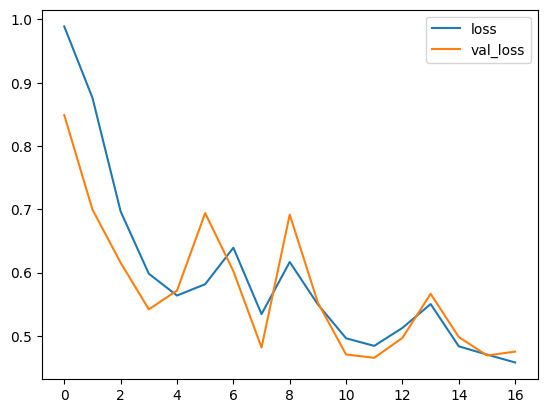

In [129]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

plt.show()


Maximum Obtained Accuracy: 0.7795


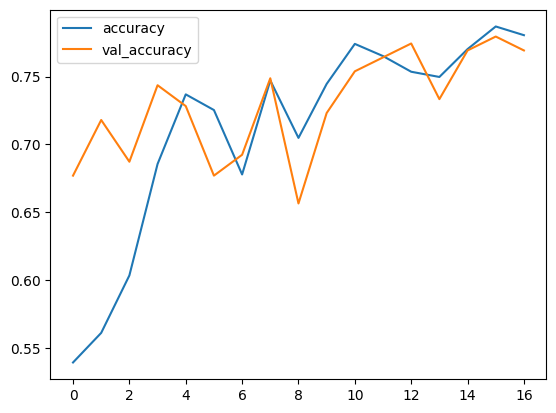

In [130]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Maximum Obtained Accuracy: {:0.4f}").format(history_df['val_accuracy'].max()))

plt.show()

#0.8051 without early stopping
#0.7795 with early stopping

In [ ]:
ann_model.load_weights(checkpoint_filepath)
ann_model.predict(x_test_encoded).flatten()